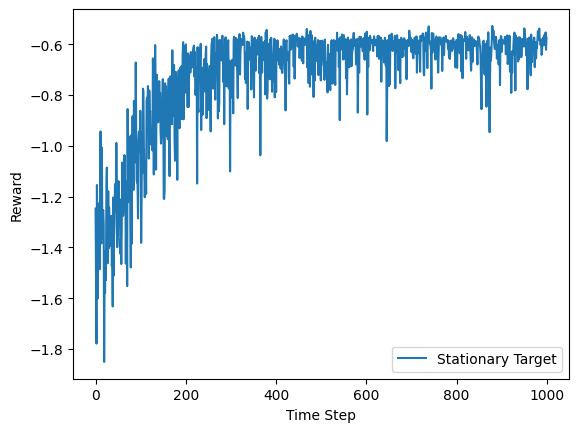

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Robot arm forward kinematics (state -> end-effector position)
def forward_kinematics(theta):
    l1, l2 = 1.0, 1.0  # Link lengths
    x = l1 * np.cos(theta[0]) + l2 * np.cos(theta[0] + theta[1])
    y = l1 * np.sin(theta[0]) + l2 * np.sin(theta[0] + theta[1])
    return np.array([x, y])

# Stationary reward function
def reward(theta, action):
    target = np.array([1.0, 1.0])  # Fixed target
    new_theta = theta + action
    ee_pos = forward_kinematics(new_theta)
    return -np.linalg.norm(ee_pos - target)  # Negative distance

# Policy gradient training (stationary target)
def train_stationary(n_steps=1000, alpha=0.1):
    theta = np.array([0.0, 0.0])  # Initial joint angles
    rewards = []
    action_history = []
    
    for t in range(n_steps):
        # Sample action (Gaussian noise for exploration)
        action = np.random.normal(0, 0.1, size=2)
        action_history.append(action)
        
        # Compute reward
        r = reward(theta, action)
        
        # Update policy (gradient ascent)
        theta += alpha * r * action  # Simplified policy gradient
        
        rewards.append(r)
    
    return rewards, action_history

# Run and plot
rewards_stat, action_history = train_stationary()
plt.plot(rewards_stat, label="Stationary Target")
plt.xlabel("Time Step"); plt.ylabel("Reward"); plt.legend()
plt.show()